# What are image pyramids?

[SOURCE](https://www.pyimagesearch.com/2015/03/16/image-pyramids-with-python-and-opencv/)

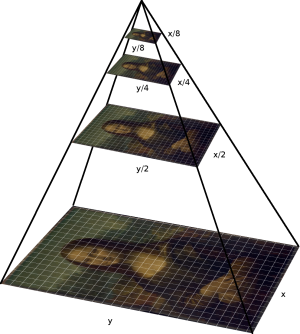

An "image pyramid" is a multi-scale representation of an image.

Utilizing an image pyramid allows us to find objects in images at different scales of an image. And when combined with a sliding window we can find objects in images in various locations.

At the bottom of the pyramid we have the original image at its original size (in terms of width and height). And at each subsequent layer, the image is resized (subsampled) and optionally smoothed (usually via Gaussian blurring).

The image is progressively subsampled until some stopping criterion is met, which is normally a minimum size has been reached and no further subsampling needs to take place.

In [1]:
%matplotlib widget
# SOURCE for this project is: https://www.pyimagesearch.com/2014/11/17/non-maximum-suppression-object-detection-python/
# https://colab.research.google.com/drive/1tdkpKPjUtj_Aq8ponvzd8H4dx1-fSRkv?usp=sharing#scrollTo=Wk5I4XJH5z_x


# Get images from here: https://www.cs.cmu.edu/afs/cs/project/vision/vasc/idb/www/html/face/

In [3]:


# USAGE
# python non-maximum-suppression-case-study.py --image ../images/beach.png
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html
# SEE: https://umar-yusuf.blogspot.com/2020/04/crop-images-using-python-opencv-module.html

import os
import argparse
import pathlib
from typing import Union, Any

import mahotas
import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt
from skimage.transform import pyramid_gaussian
import better_exceptions
better_exceptions.MAX_LENGTH = None

# Construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(
    f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/notebooks")
# print(current_folder)

# /Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/practical_python_and_opencv_case_studies/face_detection/images/obama.png
# # Calculating path to the input data
args["image"] = pathlib.Path(
    f"{current_folder.parent}/practical_python_and_opencv_case_studies/face_detection/images/obama.png").resolve()
args["scale"] = 1.5

# print(args["image"])

assert args["image"].exists()

# SOURCE: http://engineering.curalate.com/2017/04/13/content-based-intelligent-cropping.html
def showImage(img):
    # plt.axis('off')
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    temp_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

    # SOURCE: https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88
    display(Image.fromarray(temp_image))

# _image = f"{args['image']}"
image: Union[np.ndarray, Any]
# # # Load the image and show it
image = cv2.imread(f"{args['image']}")

def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

# SOURCE: https://stackoverflow.com/questions/46689428/convert-np-array-of-type-float64-to-type-uint8-scaling-values
def plt_imshow_scikit(title, data):
    # Get the information of the incoming image type
    info = np.iinfo(data.dtype) 
    # normalize the data to 0 - 1
    data = data.astype(np.float64) / info.max
    # Now scale by 255
    data = 255 * data 
    img = data.astype(np.uint8)
    
    # convert the image frame BGR to RGB color space and display it
    #img_float32 = np.float32(img)
    #lab_image = cv2.cvtColor(img_float32, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.grid(False)
    plt.show()

try:
    xrange
except NameError:
    xrange = range



In [5]:
# Method #1: Image Pyramids with Python and OpenCV
def pyramid(image, scale=args["scale"], minSize=(30, 30)):
    # yield the original image
    yield image
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image
        
def run_pyramid(image: Union[np.ndarray, Any], scale=args["scale"]):
    # METHOD #1: No smooth, just scaling.
    # loop over the image pyramid
    for (i, resized) in enumerate(pyramid(image, scale=scale)):
        # show the resized image
        plt_imshow("[opencv] Layer {}".format(i + 1), resized)
        

In [7]:
def run_pyramid_scikit(image: Union[np.ndarray, Any], scale=args["scale"]):
    # METHOD #2: Resizing + Gaussian smoothing.
    for (i, resized) in enumerate(pyramid_gaussian(image, downscale=2)):
        # if the image is too small, break from the loop
        if resized.shape[0] < 30 or resized.shape[1] < 30:
            break

        # show the resized image
        plt_imshow_scikit("[scikit] Layer {}".format(i + 1), resized)

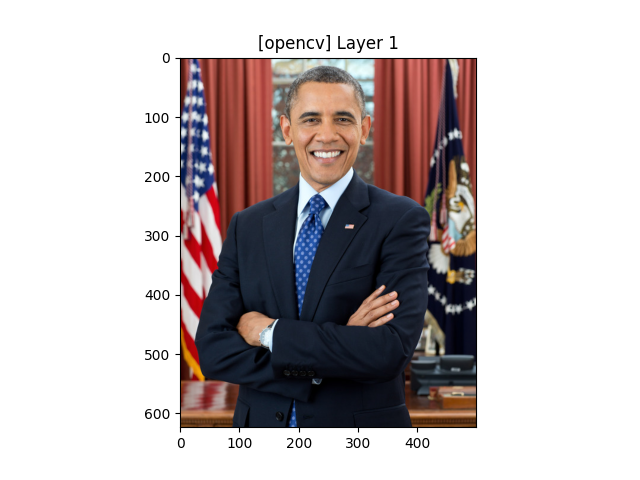

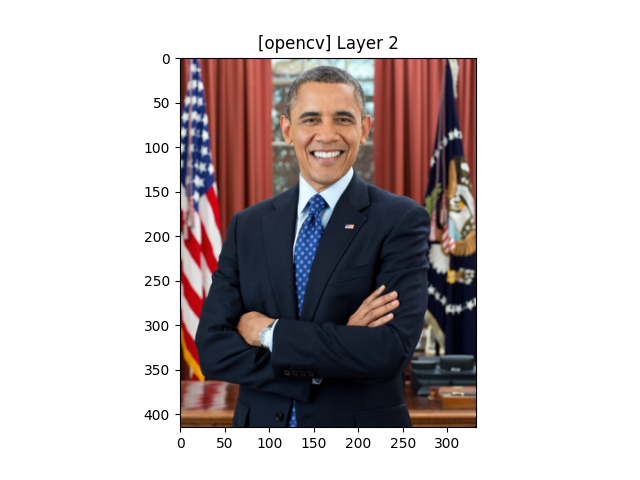

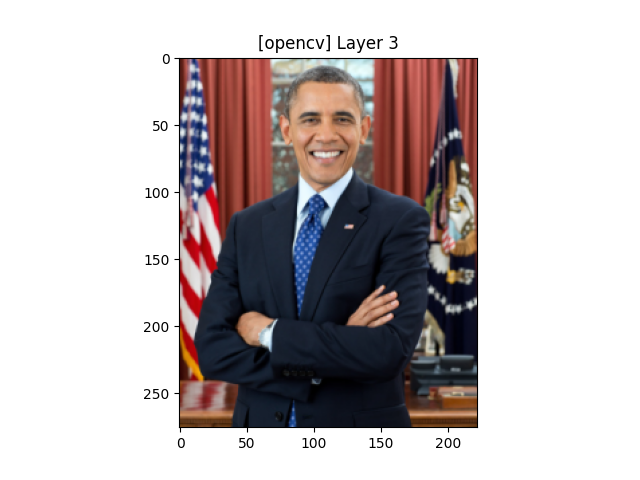

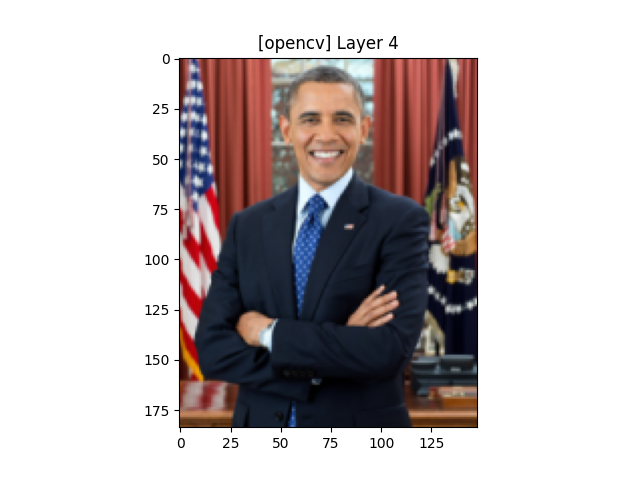

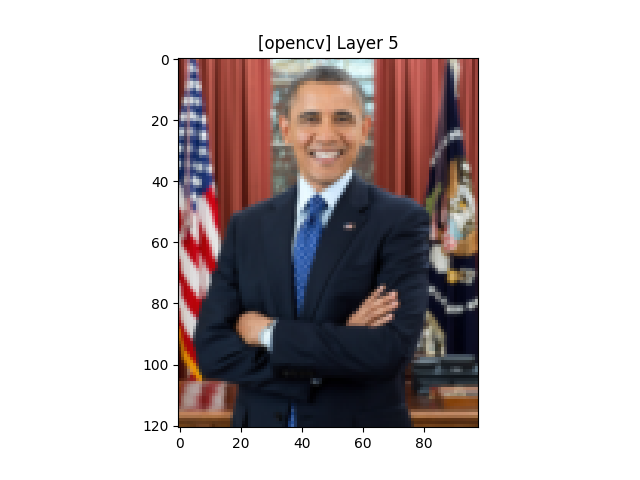

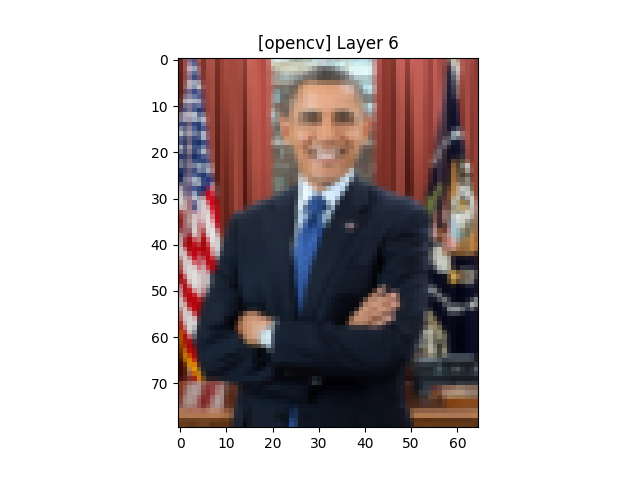

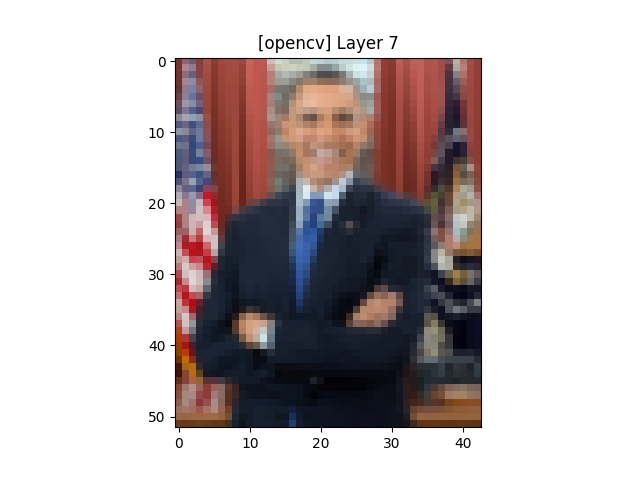

In [9]:
# RUN IT
# python pyramid.py --image images/adrian_florida.jpg --scale 1.5

run_pyramid(image)


In [11]:
run_pyramid_scikit(image)

<class 'ValueError'>: Invalid integer data type 'f'.